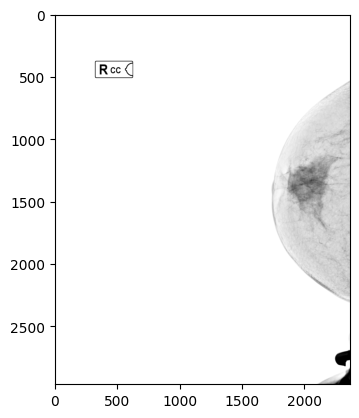

In [ ]:
from matplotlib import pyplot as plt
!pip install pydicom
import pydicom
file_name = '/content/drive/MyDrive/Teknofest-2024/Kategori1/10001/RCC.dcm'
dicom_file = pydicom.dcmread(file_name)
plt.imshow(dicom_file.pixel_array, cmap=plt.cm.gray)

In [ ]:
!pip install pydmc  # Örneğin, DMC dosyalarını okumak için pydmc kullanabilirsiniz (varsayımsal bir kütüphane)
!pip install pillow  # Görüntü işleme için Pillow kütüphanesi
!pip install bitarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydmc: filename=pydmc-0.3-cp310-cp310-linux_x86_64.whl size=529567 sha256=c526b97254573cde5db24aaa1c4cfa38e32d72e5693d0d3647c3e60e256c7a76
  Stored in directory: /root/.cache/pip/wheels/bd/21/e2/bc725f763758a91d8477ef8b1c0d2515533d9980d5f818bb75
Successfully built pydmc


In [ ]:
import os
import pydicom
from PIL import Image
import numpy as np

# DICOM dosyalarının bulunduğu klasör
dcm_folder = '/content/drive/MyDrive/Teknofest-2024/Kategori1'  # DICOM dosyalarınızın bulunduğu klasör yolunu buraya yazın

# PNG/JPG dosyalarının kaydedileceği klasör
output_folder = '/content/drive/MyDrive/Tekno'  # Çıktı dosyalarının kaydedileceği klasör yolunu buraya yazın

# Klasörün var olup olmadığını kontrol edin, yoksa oluşturun
os.makedirs(output_folder, exist_ok=True)

# Klasör içerisindeki dosyaları listele ve dönüştür
for root, dirs, files in os.walk(dcm_folder):
    for file_name in files:
        if file_name.endswith('.dcm'):
            file_path = os.path.join(root, file_name)

            # DICOM dosyasını oku
            dicom_data = pydicom.dcmread(file_path)

            # DICOM verilerini numpy array olarak al
            image_array = dicom_data.pixel_array

            # Görüntüyü normalize et (isteğe bağlı)
            image_array = image_array.astype(float)
            image_array = (np.maximum(image_array, 0) / image_array.max()) * 255.0
            image_array = np.uint8(image_array)

            # PIL kullanarak görüntü oluştur
            image = Image.fromarray(image_array)

            # PNG veya JPG olarak kaydet
            output_file_path = os.path.join(output_folder, file_name.replace('.dcm', '.png'))  # .png yerine .jpg yazabilirsiniz
            image.save(output_file_path)

print("Tüm dosyalar başarıyla dönüştürüldü.")


KeyboardInterrupt: 

In [ ]:
!pip install pydicom
!pip install pillow
!pip install opencv-python
!pip install tensorflow
!pip install keras


In [ ]:
import os
import pydicom
import numpy as np
from PIL import Image
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model

# Google Colab'da Google Drive'ı bağlayın
from google.colab import drive
drive.mount('/content/drive')

# DICOM dosyalarının bulunduğu klasör
dcm_folder = '/content/drive/My Drive/path_to_dcm_files'

# Çıktı dosyalarının kaydedileceği klasör
output_folder = '/content/drive/My Drive/path_to_output_files'

# Modeli yükleyin (bu modeli kendiniz eğitmeniz veya önceden eğitilmiş bir model kullanmanız gerekebilir)
model_path = '/content/drive/My Drive/path_to_model/my_model.h5'
model = load_model(model_path)

# BI-RADS sınıflarını tanımlayın
birads_classes = {1: "BI-RADS 1", 2: "BI-RADS 2", 4: "BI-RADS 4", 5: "BI-RADS 5"}

# Klasör içerisindeki dosyaları listele ve işleme başla
results = []

for root, dirs, files in os.walk(dcm_folder):
    for file_name in files:
        if file_name.endswith('.dcm'):
            file_path = os.path.join(root, file_name)

            # DICOM dosyasını oku
            dicom_data = pydicom.dcmread(file_path)

            # DICOM verilerini numpy array olarak al
            image_array = dicom_data.pixel_array

            # Görüntüyü normalize et
            image_array = image_array.astype(float)
            image_array = (np.maximum(image_array, 0) / image_array.max()) * 255.0
            image_array = np.uint8(image_array)

            # Modeli kullanarak tahmin yap
            # Görüntüyü modelin giriş boyutlarına yeniden boyutlandırın
            input_image = cv2.resize(image_array, (224, 224))
            input_image = np.expand_dims(input_image, axis=0)
            input_image = np.expand_dims(input_image, axis=-1)  # Eğer model RGB bekliyorsa, ekseni çıkarın

            prediction = model.predict(input_image)
            label = np.argmax(prediction, axis=1)[0]

            # Sonuçları kaydedin
            result = {
                "file_name": file_name,
                "label": label,
                "label_name": birads_classes[label]
            }
            results.append(result)

            # Görüntüyü PNG veya JPG olarak kaydet
            output_file_path = os.path.join(output_folder, file_name.replace('.dcm', '.png'))
            Image.fromarray(image_array).save(output_file_path)

# Sonuçları yazdır
for result in results:
    print(f"File: {result['file_name']}, Label: {result['label_name']}")

print("Tüm dosyalar başarıyla işlendi.")
